In [1]:
import pandas as pd
data_path = "../trailing_avg_diff_V2.csv"
dataframe = pd.read_csv(data_path, header=0, index_col = 0)

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%matplotlib inline

Using TensorFlow backend.


In [3]:
dataframe['Wloc'].replace(to_replace=['H', 'A', 'N'], value=['0', '1', '2'], inplace=True)

In [4]:
from collections import Counter
t1_count = Counter(dict(dataframe['team1'].value_counts()))
t1_count

Counter({1112: 479, 1103: 445, 1130: 443, 1104: 441, 1107: 440, 1139: 436, 1153: 432, 1110: 431, 1163: 428, 1133: 427, 1124: 418, 1122: 416, 1125: 415, 1150: 414, 1140: 412, 1181: 412, 1116: 411, 1126: 410, 1129: 409, 1113: 405, 1111: 402, 1102: 401, 1114: 401, 1196: 399, 1211: 398, 1145: 395, 1228: 395, 1142: 394, 1174: 393, 1173: 391, 1166: 390, 1155: 389, 1123: 388, 1143: 383, 1127: 378, 1148: 377, 1151: 375, 1164: 375, 1106: 373, 1152: 370, 1120: 369, 1105: 368, 1144: 368, 1135: 363, 1160: 363, 1193: 362, 1117: 361, 1180: 361, 1156: 360, 1170: 360, 1222: 358, 1132: 357, 1131: 356, 1231: 356, 1242: 356, 1168: 354, 1119: 353, 1182: 350, 1108: 348, 1176: 346, 1137: 345, 1138: 344, 1192: 343, 1177: 342, 1186: 342, 1149: 338, 1234: 337, 1207: 336, 1187: 333, 1194: 333, 1206: 333, 1175: 332, 1158: 331, 1200: 331, 1161: 330, 1179: 330, 1183: 329, 1199: 327, 1201: 325, 1169: 323, 1235: 323, 1233: 322, 1162: 321, 1184: 320, 1236: 319, 1178: 318, 1154: 316, 1258: 315, 1190: 313, 1172: 312, 1

In [5]:
t2_count = Counter(dict(dataframe['team2'].value_counts()))
t2_count

Counter({1458: 480, 1462: 474, 1452: 456, 1455: 450, 1437: 445, 1443: 440, 1435: 431, 1436: 430, 1431: 426, 1444: 426, 1448: 424, 1450: 422, 1433: 419, 1449: 417, 1461: 415, 1393: 414, 1456: 414, 1447: 413, 1411: 411, 1389: 406, 1403: 406, 1457: 405, 1459: 404, 1460: 398, 1429: 397, 1416: 394, 1464: 394, 1388: 393, 1451: 392, 1439: 391, 1401: 389, 1463: 386, 1404: 382, 1396: 379, 1412: 375, 1427: 375, 1345: 374, 1373: 373, 1420: 372, 1428: 372, 1438: 372, 1441: 372, 1391: 371, 1442: 370, 1425: 369, 1424: 368, 1405: 367, 1354: 364, 1387: 364, 1423: 364, 1415: 362, 1397: 361, 1414: 361, 1384: 359, 1399: 358, 1409: 358, 1417: 357, 1418: 357, 1400: 355, 1426: 353, 1454: 353, 1380: 351, 1386: 351, 1419: 350, 1325: 347, 1351: 342, 1356: 341, 1383: 341, 1365: 340, 1392: 339, 1385: 337, 1398: 336, 1376: 334, 1440: 332, 1406: 331, 1408: 330, 1326: 327, 1434: 327, 1313: 326, 1422: 323, 1298: 322, 1314: 321, 1366: 319, 1382: 319, 1421: 318, 1320: 317, 1336: 315, 1357: 315, 1407: 311, 1430: 311, 1

In [6]:
print(t1_count + t2_count)

Counter({1181: 500, 1242: 500, 1246: 498, 1314: 498, 1277: 494, 1196: 490, 1257: 486, 1393: 485, 1458: 485, 1163: 484, 1272: 482, 1326: 482, 1112: 479, 1400: 478, 1462: 475, 1228: 474, 1338: 473, 1417: 471, 1437: 471, 1211: 469, 1433: 469, 1301: 465, 1452: 463, 1323: 460, 1266: 459, 1345: 458, 1139: 457, 1153: 457, 1332: 457, 1397: 457, 1166: 456, 1276: 456, 1328: 456, 1173: 455, 1268: 455, 1329: 455, 1449: 454, 1231: 453, 1281: 453, 1455: 453, 1435: 450, 1140: 449, 1280: 449, 1386: 449, 1130: 448, 1143: 448, 1199: 448, 1396: 448, 1424: 448, 1207: 447, 1234: 447, 1235: 447, 1325: 447, 1330: 447, 1403: 447, 1210: 446, 1261: 446, 1390: 446, 1425: 446, 1103: 445, 1116: 445, 1350: 445, 1401: 445, 1206: 444, 1279: 444, 1436: 444, 1233: 443, 1243: 443, 1274: 443, 1278: 443, 1307: 443, 1443: 443, 1320: 442, 1373: 442, 1104: 441, 1310: 441, 1412: 441, 1448: 441, 1107: 440, 1356: 440, 1245: 439, 1284: 439, 1308: 439, 1352: 439, 1428: 439, 1429: 439, 1438: 439, 1125: 438, 1214: 438, 1344: 438, 1

In [10]:
dataframe.drop('score_diff', axis = 1, inplace=True)

In [11]:
dataframe

,Daynum,team1,team2,Wloc,Numot,fgm_diff,fga_diff,fgm3_diff,fga3_diff,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
Season,,,,,,,,,,,,,,,,,,,
2003,10,1104,1328,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,10,1272,1393,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,11,1266,1437,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,11,1296,1457,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,11,1208,1400,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,11,1186,1458,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2003,12,1161,1236,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,12,1186,1457,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2003,12,1156,1194,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [12]:
d2 = dataframe.loc[dataframe['team2'] == 1181]
#d2

In [9]:
#dataset = dataframe.loc[dataframe['team2'] == 1458]
dataset = pd.concat([d1, d2])
dataset.reset_index(inplace=True)
#dataset.sort_values(by = ['Daynum'], ascending=True)
dataset.sort_values(by = ['Season', 'Daynum'], inplace=True)
dataset

,Season,Daynum,team1,team2,Wloc,Numot,score_diff,fgm_diff,fga_diff,fgm3_diff,...,ftm_diff,fta_diff,or_diff,dr_diff,ast_diff,to_diff,stl_diff,blk_diff,pf_diff,WorL
412,2003,19,1119,1181,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
413,2003,21,1172,1181,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
0,2003,26,1181,1417,2,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,2003,29,1181,1326,2,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2003,33,1181,1276,0,0,0.139954,0.115156,-0.015437,0.077778,...,0.174603,0.028879,-0.081987,0.187778,0.243534,-0.223754,0.139683,0.033333,0.053333,1
3,2003,43,1181,1299,2,0,0.368584,0.274471,0.072090,0.136508,...,0.496732,0.370083,0.158593,0.202299,0.504023,-0.575000,0.339733,0.652237,-0.307870,1
414,2003,55,1173,1181,0,0,0.147593,0.069444,-0.146809,0.157828,...,0.289409,0.210459,-0.792929,0.055797,0.225371,-0.391946,0.175926,0.600000,-0.124638,0
4,2003,59,1181,1193,0,0,0.243356,0.201905,0.089286,0.531481,...,0.079772,-0.097436,0.088889,0.064394,0.361111,-0.329437,0.232540,0.161111,-0.152515,1
415,2003,62,1155,1181,1,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,2003,65,1181,1207,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [10]:
#dataset.reset_index(inplace=True)

In [11]:
#dataset.sort_values(by = ['Season', 'Daynum'], inplace=True)
#dataset.sort_values(by = ['Season'])
#dataset

In [12]:
dataset.shape

(500, 21)

In [13]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # data: Sequence of observations as a list or 2D NumPy array. Required.
    # n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
    #### window time series analysis: set n_in as 2, 3, ...
    # n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
    #### using past observations to forecast a sequence of future observations: multi-step, set n_in & n_out as 2, 3, ...
    # dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.
    #### Multi-variate forecasting: call this function on a dataframe as data
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data) 
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    #### Given a DataFrame, the shift() function can be used to create copies of columns 
    #### that are pushed forward (rows of NaN values added to the front) or pulled back 
    #### (rows of NaN values added to the end).
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    # return: Pandas DataFrame of series framed for supervised learning.
    return agg

In [14]:
values = dataframe.values
# encode wind_dir as integer
encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])
# coerce all data into float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.064935   0.008310   0.621170        1.0        0.0   0.370367   
2   0.064935   0.473684   0.802228        1.0        0.0   0.370367   
3   0.071429   0.457064   0.924791        1.0        0.0   0.370367   
4   0.071429   0.540166   0.980501        1.0        0.0   0.370367   
5   0.071429   0.296399   0.821727        1.0        0.0   0.370367   

   var7(t-1)  var8(t-1)  var9(t-1)  var17(t-1)    ...     var10(t)  var11(t)  \
1   0.618047   0.881454   0.857919    0.876054    ...     0.876803  0.895344   
2   0.618047   0.881454   0.857919    0.876054    ...     0.876803  0.895344   
3   0.618047   0.881454   0.857919    0.876054    ...     0.876803  0.895344   
4   0.618047   0.881454   0.857919    0.876054    ...     0.876803  0.895344   
5   0.618047   0.881454   0.857919    0.876054    ...     0.876803  0.895344   

   var12(t)  var13(t)  var14(t)  var15(t)  var16(t)  var17(t)  var18(t)  \
1  0.893087    0.

In [15]:
# split into train and test sets
values = reframed.values
n_train_hours = 60000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 1, 30) (60000,) (12154, 1, 30) (12154,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from matplotlib import pyplot as plt

Train on 60000 samples, validate on 12154 samples
Epoch 1/100
9s - loss: 0.5173 - acc: 0.7432 - val_loss: 0.4453 - val_acc: 0.7950
Epoch 2/100
8s - loss: 0.4215 - acc: 0.7970 - val_loss: 0.4210 - val_acc: 0.8094
Epoch 3/100
8s - loss: 0.3498 - acc: 0.8415 - val_loss: 0.3133 - val_acc: 0.8940
Epoch 4/100
9s - loss: 0.2717 - acc: 0.8887 - val_loss: 0.2849 - val_acc: 0.9036
Epoch 5/100
9s - loss: 0.2354 - acc: 0.9056 - val_loss: 0.3204 - val_acc: 0.8853
Epoch 6/100
9s - loss: 0.2149 - acc: 0.9131 - val_loss: 0.2749 - val_acc: 0.9000
Epoch 7/100
9s - loss: 0.2012 - acc: 0.9180 - val_loss: 0.2696 - val_acc: 0.9004
Epoch 8/100
9s - loss: 0.1931 - acc: 0.9252 - val_loss: 0.2687 - val_acc: 0.8994
Epoch 9/100
9s - loss: 0.1856 - acc: 0.9295 - val_loss: 0.2930 - val_acc: 0.8927
Epoch 10/100
8s - loss: 0.1819 - acc: 0.9322 - val_loss: 0.2362 - val_acc: 0.9147
Epoch 11/100
8s - loss: 0.1782 - acc: 0.9338 - val_loss: 0.2497 - val_acc: 0.9035
Epoch 12/100
9s - loss: 0.1722 - acc: 0.9342 - val_loss: 

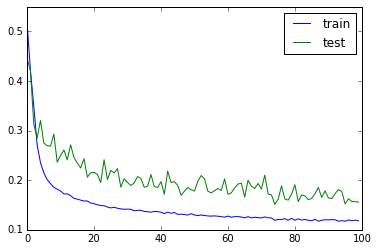

In [17]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#### appears that two stacked LSTM layers overfit the model
model.add(Dropout(0.5))
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

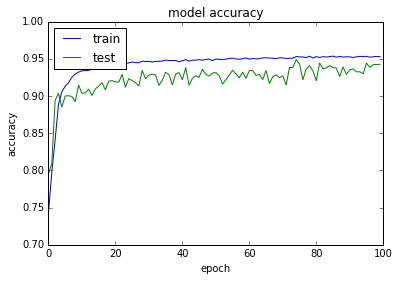

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
import numpy as np
# list all data in history
#print(history.history['val_acc'])
val_acc_array = np.array(history.history['val_acc'])
print("Average Accuracy: %.2f%%" % (np.mean(val_acc_array)*100))
print("Accuracy Standard Deviation: %.2f%%" % (np.std(val_acc_array)*100))

Average Accuracy: 92.26%
Accuracy Standard Deviation: 2.13%


In [20]:
# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.26%
